This script reads in the final ready-to-use cleaned dataset and applies the simple decision tree classifier.

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import numpy as np
import pandas as pd

In [66]:
user_id =14211777.0 #float

In [67]:
# import dataset to work with
df = pd.read_csv('data_cleaned.csv')

# extract specific user
luckyguy = df[df['user_id'] == user_id]

In [68]:
# apply decision tree model

# select features and target
feature_columns = [
    'IsFree', 
    'GenreIsNonGame', 
    'GenreIsIndie', 
    'GenreIsAction', 
    'GenreIsAdventure', 
    'GenreIsCasual', 
    'GenreIsStrategy', 
    'GenreIsRPG', 
    'GenreIsSimulation', 
    'GenreIsEarlyAccess', 
    'GenreIsFreeToPlay', 
    'GenreIsSports', 
    'GenreIsRacing', 
    'GenreIsMassivelyMultiplayer', 
    'After2014', 
    'Expensive'
]
X = luckyguy[feature_columns]
y = luckyguy['is_recommended']

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train 
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# evaluate model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# detailed classification report
# print("\nClassification Report:\n")
# print(classification_report(y_test, y_pred))

# calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Accuracy: 1.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00


In [69]:
# if we want to test out games that are not in the train-test data list, we can input that game's genre here for fun. Could be accurate if the accuracy is high
# Disclaimer: this part of code is inspired by ChatGTP

# Predict if a user will like a new item
new_item = pd.DataFrame({'IsFree' : [0], 
                   'GenreIsNonGame': [0], 
                   'GenreIsIndie': [0], 
                   'GenreIsAction': [0], 
                   'GenreIsAdventure': [1], 
                   'GenreIsCasual': [0], 
                   'GenreIsStrategy': [0], 
                   'GenreIsRPG': [0], 
                   'GenreIsSimulation': [0], 
                   'GenreIsEarlyAccess': [0], 
                   'GenreIsFreeToPlay': [0], 
                   'GenreIsSports': [0], 
                   'GenreIsRacing': [0], 
                   'GenreIsMassivelyMultiplayer': [0], 
                   'After2014': [0], 
                   'Expensive': [0],
                   'After2014': [1], 
                   'Expensive': [0]})
prediction = model.predict(new_item)

print(f"Will the user like the item? {'Yes' if prediction[0] == 1 else 'No'}")

Will the user like the item? Yes


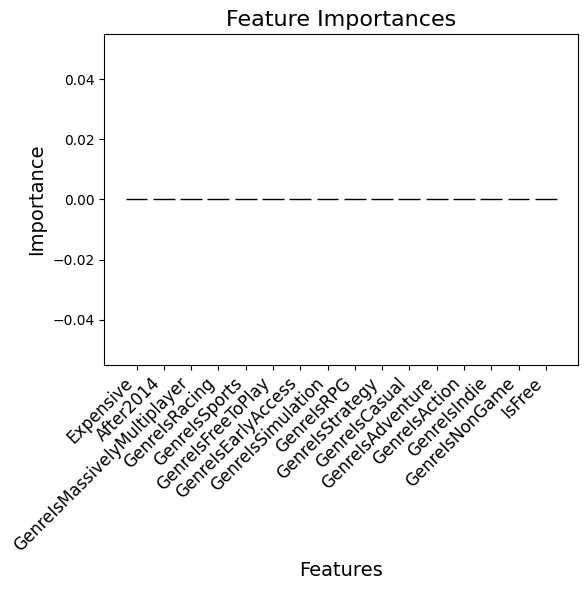

Feature Ranking:
1. Expensive (0.0000)
2. After2014 (0.0000)
3. GenreIsMassivelyMultiplayer (0.0000)
4. GenreIsRacing (0.0000)
5. GenreIsSports (0.0000)
6. GenreIsFreeToPlay (0.0000)
7. GenreIsEarlyAccess (0.0000)
8. GenreIsSimulation (0.0000)
9. GenreIsRPG (0.0000)
10. GenreIsStrategy (0.0000)
11. GenreIsCasual (0.0000)
12. GenreIsAdventure (0.0000)
13. GenreIsAction (0.0000)
14. GenreIsIndie (0.0000)
15. GenreIsNonGame (0.0000)
16. IsFree (0.0000)


In [70]:
import matplotlib.pyplot as plt

# calculate feature importances for each feature from HW3
importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0) if hasattr(model, 'estimators_') else None
indices = np.argsort(importances)[::-1]

# plot
plt.figure(figsize=(6,6))
plt.title("Feature Importances", fontsize=16)
plt.bar(range(len(feature_columns)), importances[indices], color="skyblue",
        yerr=std[indices] if std is not None else None, align="center", edgecolor="black")
plt.xticks(range(len(feature_columns)), np.array(feature_columns)[indices], rotation=45, ha='right', fontsize=12)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.tight_layout()
plt.show()

# print feature ranking
print("Feature Ranking:")
for rank, index in enumerate(indices, start=1):
    print(f"{rank}. {feature_columns[index]} ({importances[index]:.4f})")

ValueError: 'label' must be of length 'x'

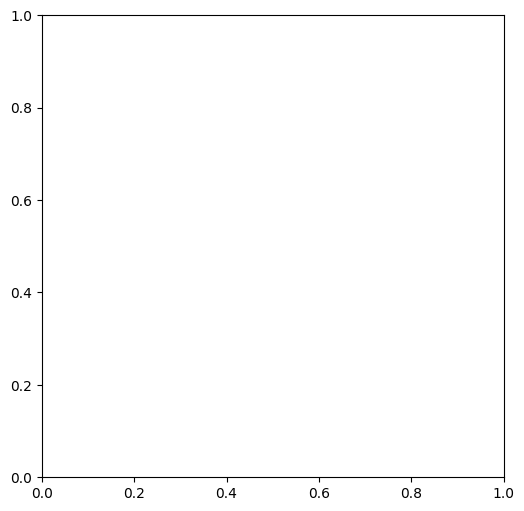

In [71]:
# count recommendation for this user
recommendation_counts = luckyguy['is_recommended'].value_counts()
labels = ['Not Recommended', 'Recommended']
values = recommendation_counts.values
colors = ["steelblue", "orange"]

# Pie Chart for Recommendation Rate
plt.figure(figsize=(6, 6))
plt.pie(
    values, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90, 
    textprops={'fontsize': 12},
    explode=(0.1, 0)  # slightly explode the "Recommended" slice
)
plt.title("Game Recommendation Rate", fontsize=16)
plt.show()